In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.txt")
U = df['U']
I = df['I']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


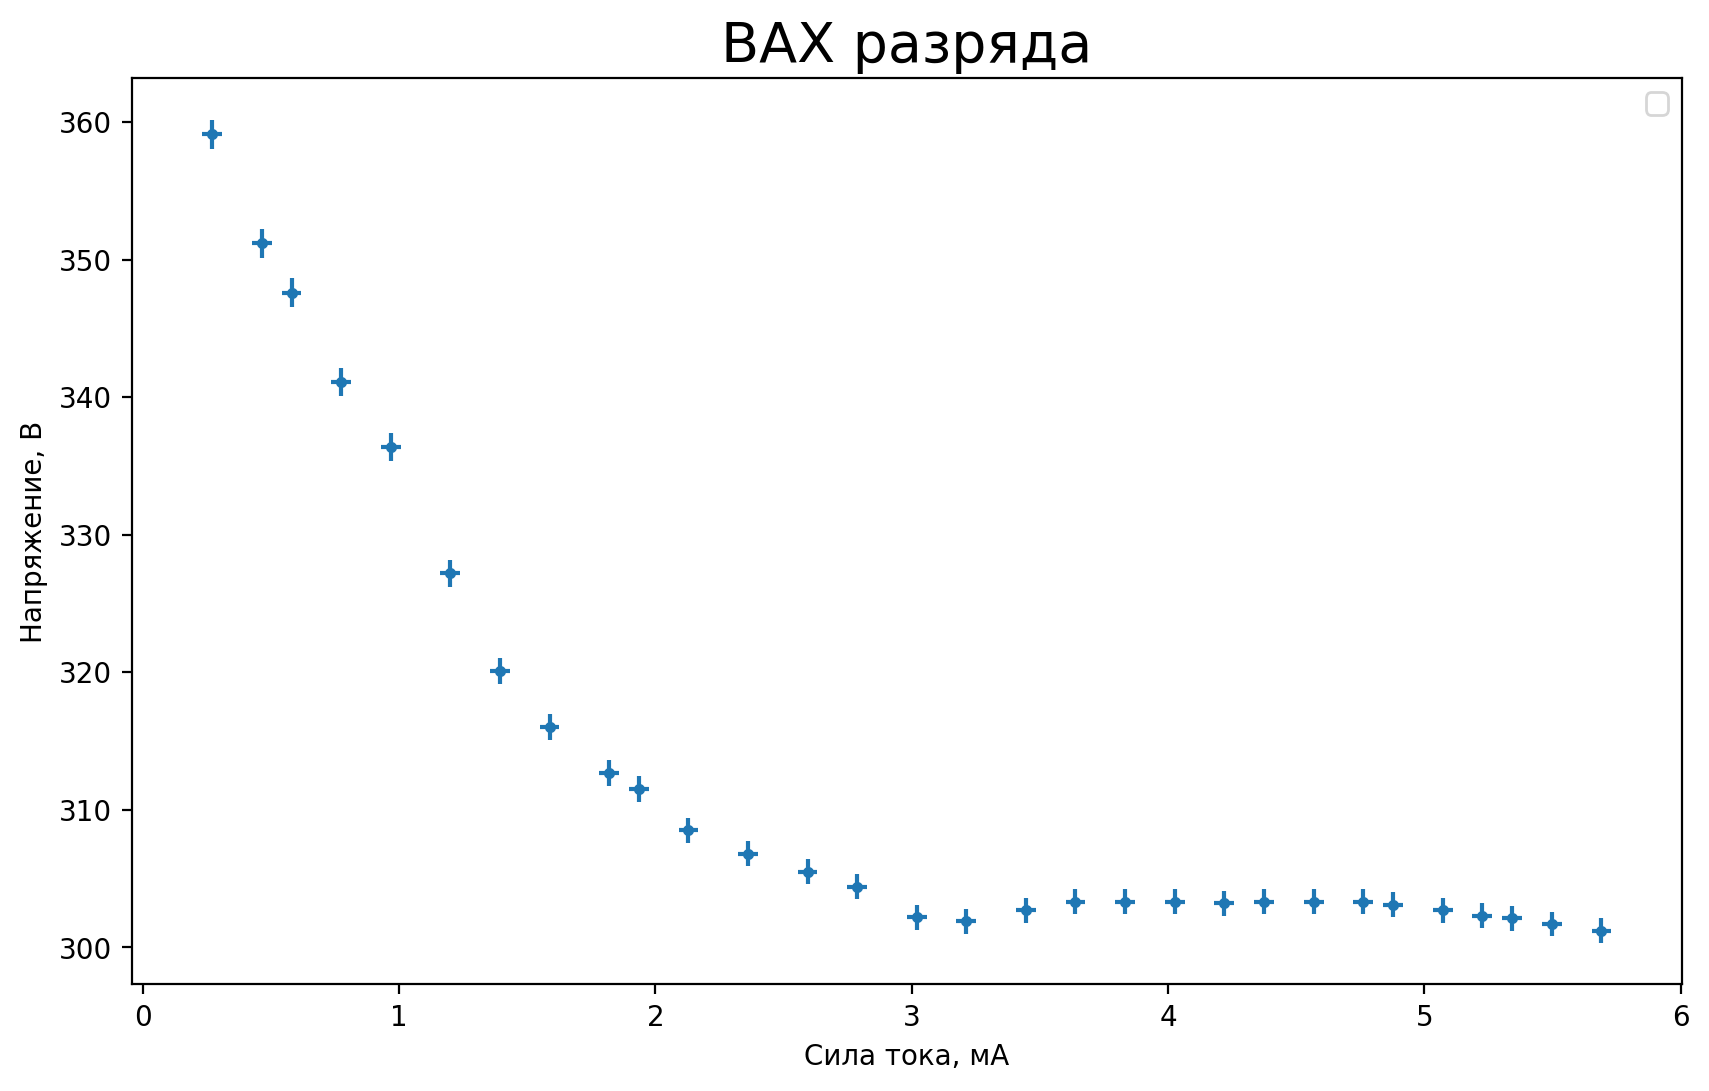

In [15]:
plt.figure(figsize=(10, 6), dpi=200)

plt.errorbar(I*6/155, 10*U, xerr=6/155, yerr=10*0.003*U, linestyle='', marker='.')

plt.title("ВАХ разряда", fontsize=20)
plt.xlabel("Сила тока, мА")
plt.ylabel("Напряжение, В")

plt.legend()
plt.show()